# Escola de idiomas - Técnicas de Machine Learning (Binarizado)

### Métodos:

* Regressão Linear
* Regressão Logistica
* SVM
* KNN
* RandomForest
* DecisionTree
* Redes Neurais
* PCA

#### Importando as bibliotecas:
* pandas, numpy, matplotlib e seaborn
* sklearn.preprocessing (StandardScaler) e sklearn.model_selection (train_test_split)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report ,confusion_matrix

In [2]:
#importando o arquivo de dados
dados_escola = 'Arquivos\Binarização.xlsx'
df = pd.read_excel(dados_escola)

In [3]:
#Avaliando e verificando os dados
df.head()

,Caso,Idade,Renda,Sexo,Solteiro(a),Casado(a),Separado(a),Outro Status,Filhos,Escolaridade,...,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE,Desistencia
0,1,24,1,1,1,0,0,0,1,2,...,6,4,3,2,4,3,3,1,3,0
1,1,21,3,1,1,0,0,0,1,2,...,6,6,4,4,5,3,3,1,4,0
2,1,47,3,2,0,1,0,0,3,3,...,5,5,3,3,4,4,4,1,4,0
3,1,24,2,2,1,0,0,0,1,2,...,6,6,3,3,4,4,3,2,3,0
4,1,20,1,1,1,0,0,0,1,2,...,6,6,3,3,4,5,5,2,5,0


In [4]:
df.describe()

,Caso,Idade,Renda,Sexo,Solteiro(a),Casado(a),Separado(a),Outro Status,Filhos,Escolaridade,...,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE,Desistencia
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2.126214,23.566343,2.990291,1.495146,0.935275,0.055016,0.006472,0.003236,1.035599,1.967638,...,5.365696,4.961165,2.851133,2.877023,3.071197,3.533981,3.841424,2.417476,3.776699,0.475728
std,0.729877,4.245659,1.356766,0.507229,0.246439,0.228382,0.080321,0.056888,0.232214,0.340342,...,0.914665,1.040626,0.934810,0.812497,1.123009,0.930879,0.851335,1.420108,0.921589,0.500221
min,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,21.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,0.000000
50%,2.000000,23.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,6.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,0.000000
75%,3.000000,25.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,6.000000,6.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,3.000000,51.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,1.000000


In [5]:
# identificação da menor taxa de erro
def buscarMenor(lst):
    i = float("inf")
    for nr in lst:
        if nr < i:
            i = nr
            c = lst.index(nr)
    return c + 1

In [6]:
#
X = df.drop('Desistencia', axis = 1)
y = df['Desistencia']
def testeMaquina(metEsc):
    i = 0
    classi_analise = []
    confu_analise_test = []
    confu_analise_train = []
    # Laço de 10 repetições para retirar média dos testes
    for i in range (0,30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        scaler = StandardScaler()
        X_train_pad = scaler.fit_transform(X_train)
        X_test_pad = scaler.fit_transform(X_test)
        pca = PCA(n_components=10)
        pca.fit(X_train_pad)
        X_train_pca = pca.transform(X_train_pad)
        X_test_pca = pca.transform(X_test_pad)
        logmodel = metEsc
        logmodel.fit(X_train_pca, y_train)
        #predição
        predictions = logmodel.predict(X_test_pca)
        predictions2 = logmodel.predict(X_train_pca)
        #imprimindo classificação
        classi_analise.append(accuracy_score(y_test,predictions))
        classi_analise.append(accuracy_score(y_train,predictions2))
        classi_analise.append(precision_score(y_test,predictions))
        classi_analise.append(precision_score(y_train,predictions2))
        classi_analise.append(f1_score(y_test,predictions))
        classi_analise.append(f1_score(y_train,predictions2))
        confu_analise_test.append(confusion_matrix(y_test,predictions))
        confu_analise_train.append(confusion_matrix(y_train,predictions2))
    i =+ 1
    
    # Reformulando os dados e remodelando
    classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (30, 6)), index=None,
                                  columns=['Acuracia_Teste', 'Acuracia_Treino', 'Precisao_Teste',
                                           'Precisao_Treino','F1_Teste', 'F1_Treino'])
    confu_analise_test = pd.DataFrame(data=np.reshape(confu_analise_test, (30, 4)), index=None, columns=None)
    confu_analise_train = pd.DataFrame(data=np.reshape(confu_analise_train, (30, 4)), index=None, columns=None)
    
    # Exportando dados para análise
    classi_analise.to_csv('Relatorio/PCA/classification_report_{}.csv'.format(str(metEsc)), index=False)
    #confu_analise_test.to_csv('Relatorio/PCA/confusion_matrix_test_{}.csv'.format(str(metEsc)), index=False)
    #confu_analise_train.to_csv('Relatorio/PCA/confusion_matrix_train{}.csv'.format(str(metEsc)), index=False)
    
    # reset dos valores
    classi_analise = []
    confu_analise_test = []
    confu_analise_train = []

## Colunas com maior impacto - PCA

In [7]:
#import da libraria
from sklearn.decomposition import PCA
from sklearn import preprocessing 
#definição dos dados
scaled_data = preprocessing.scale(df.drop('Desistencia', axis = 1).T)
#realizando os procedimentos de treinamento PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

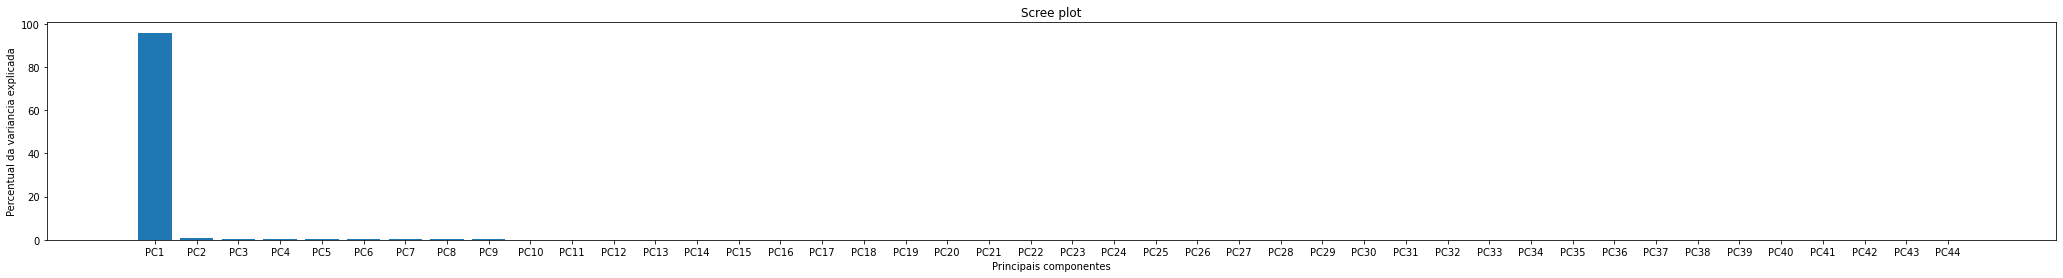

In [8]:
import random as rd
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Scree plot
plt.figure(figsize=[36, 4])
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentual da variancia explicada')
plt.xlabel('Principais componentes')
plt.title('Scree plot')
plt.show()

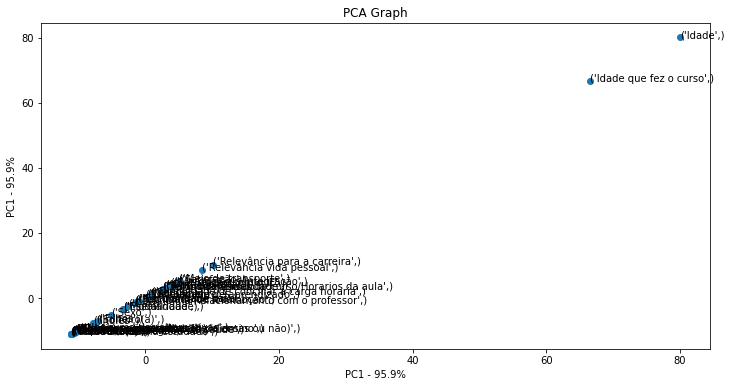

In [9]:
pca_df = pd.DataFrame(pca_data, index=[df.drop('Desistencia', axis = 1)], columns=labels)

plt.figure(figsize=[12, 6])
plt.scatter(pca_df.PC1, pca_df.PC1)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[0]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC1.loc[sample]), )

In [10]:
loading_scores = pd.Series(pca_df['PC1'])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

#definição das 15 colunas importantes 
top_15 = sorted_loading_scores[0:10].index.values

print(loading_scores[top_15])
type(loading_scores[top_15])

Idade                      80.017885
Idade que fez o curso      66.498405
Teve filho(s)             -11.053958
Outro Status              -11.043407
Separado(a)               -11.040858
Separou-se/divorciou-se   -11.038297
Mudou o idioma estudado   -10.970395
Perdeu o emprego          -10.940487
Casado(a)                 -10.866876
Outro                     -10.702473
Name: PC1, dtype: float64


pandas.core.series.Series

### Padronizando para os conjunto de treino e teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
scaler = StandardScaler()
X_train_pad = scaler.fit_transform(X_train)
X_test_pad = scaler.fit_transform(X_test)

### Execução do PCA

In [13]:
pca = PCA(n_components=len(X.columns))
pca.fit(X_train_pad)
X_train_pca = pca.transform(X_train_pad)
np.shape(X_train_pca)

(216, 44)

In [14]:
X_test_pca = pca.transform(X_test_pad)
var_explicada = pca.explained_variance_ratio_
var_explicada.sum()

1.0

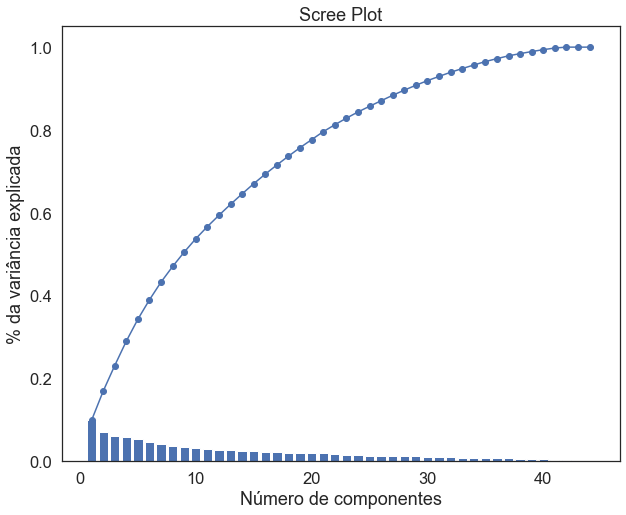

In [15]:
#Scree plot
componentes = list(i for i in range(1,45))
plt.figure(figsize=[10, 8])
sns.set(font_scale=1.5, style='white')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('% da variância explicada')
plt.bar(componentes, var_explicada)
plt.plot(componentes, np.cumsum(var_explicada), marker='o')

### Finalizando o PCA

In [16]:
pca = PCA(n_components=5)
pca.fit(X_train_pad)
X_train_pca = pca.transform(X_train_pad)
X_test_pca = pca.transform(X_test_pad)
np.shape(X_train_pca)

(216, 5)

## Naive Bayes

In [17]:
#Importando o método de RL
from sklearn.naive_bayes import GaussianNB

In [18]:
metEsc = GaussianNB()
testeMaquina(metEsc)

## Regressão Logistica

In [19]:
#Importando o método de RL
from sklearn.linear_model import LogisticRegression

In [20]:
metEsc = LogisticRegression()
testeMaquina(metEsc)

## KNN

In [21]:
#Importando o método KNN
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 1.0, 'Número de vizinhos')

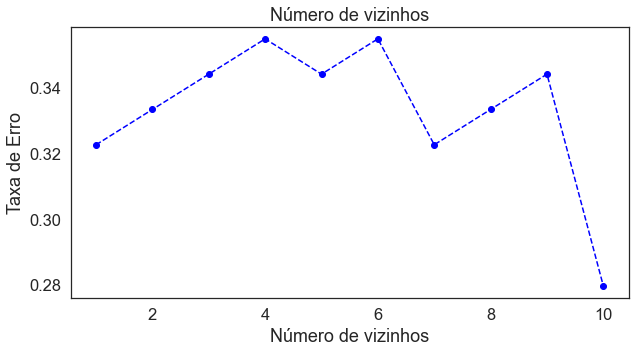

In [22]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor número de vizinhos
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    pred = knn.predict(X_test_pca)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,11), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Número de vizinhos')
plt.ylabel('Taxa de Erro')
plt.title('Número de vizinhos')

In [23]:
#validação do menor índice
menor = buscarMenor(error_rate)

#sem definição de número de visinhos
metEsc = KNeighborsClassifier()
testeMaquina(metEsc)

metEsc = KNeighborsClassifier(n_neighbors=menor)
testeMaquina(metEsc)

## SVM

In [24]:
#importando biblioteca
from sklearn.svm import SVC

In [25]:
metEsc = SVC()
testeMaquina(metEsc)

In [26]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [29]:
grid.fit(X_train_pca,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.581 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.721 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.614 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.744 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [30]:
grid.best_params_
c = grid.best_params_['C']
gamma = grid.best_params_['gamma']
kernel = grid.best_params_['kernel']

In [31]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [32]:
metEsc = SVC(C = c, gamma = gamma, kernel = kernel)
testeMaquina(metEsc)

## Arvore de Decisão

In [33]:
#importando biblioteca
from sklearn.tree import DecisionTreeClassifier

Text(0.5, 1.0, 'Scree plot')

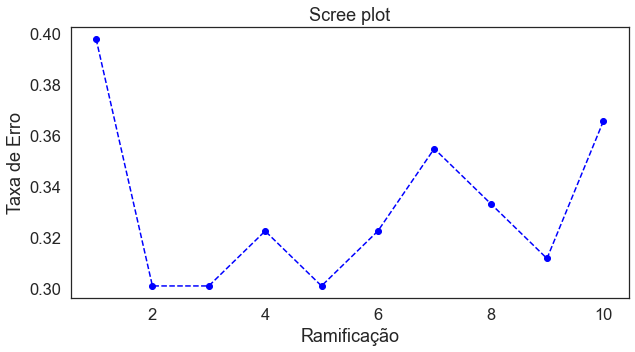

In [34]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor ponto de profundidade das folhas
for i in range(1,11):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train_pca, y_train)
    pred = dectree.predict(X_test_pca)
    error_rate.append(np.mean(pred != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,11), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Ramificação')
plt.ylabel('Taxa de Erro')
plt.title('Scree plot')

In [35]:
#validação do menor índice
menor = buscarMenor(error_rate)

#sem definição de profunidade dos nós
metEsc = DecisionTreeClassifier()
testeMaquina(metEsc)

#com definição de profunidade dos nós
metEsc = DecisionTreeClassifier(max_depth=menor)
testeMaquina(metEsc)

## Randon Forest

* a execução das etapas em RF será semelhante ao de Arvore de decisão.

In [36]:
#importando biblioteca
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Scree plot')

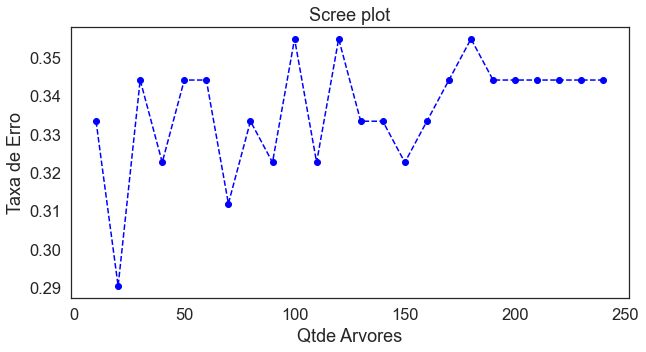

In [37]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor ponto
for i in range(10,250,10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train_pca, y_train)
    pred_forest = rfc.predict(X_test_pca)
    error_rate.append(np.mean(pred_forest != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(10,250,10), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Qtde Arvores')
plt.ylabel('Taxa de Erro')
plt.title('Scree plot')

In [38]:
#validação do menor índice
menor = buscarMenor(error_rate)

#sem definição de profunidade dos nós
metEsc = RandomForestClassifier()
testeMaquina(metEsc)

#com definição de profunidade dos nós
metEsc = RandomForestClassifier(n_estimators=menor)
testeMaquina(metEsc)

## Artificial Neural Network

In [39]:
#importando biblioteca
from sklearn.neural_network import MLPClassifier

Text(0.5, 1.0, 'Scree plot')

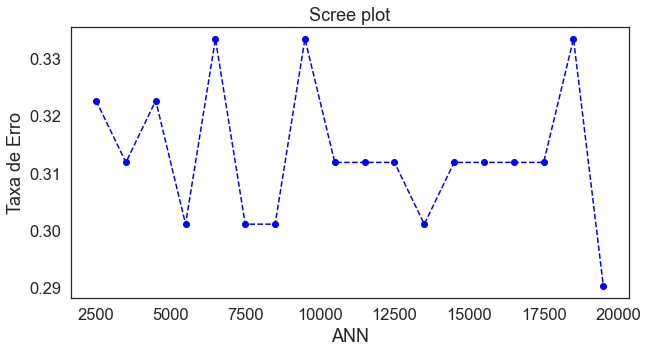

In [40]:
#criação de conjunto vazio 
error_rate = []

#criação de laço for, para definir melhor ponto
for i in range(2500,20000,1000):
    ann = MLPClassifier(max_iter = i)
    ann.fit(X_train_pca, y_train)
    pred_ann = ann.predict(X_test_pca)
    error_rate.append(np.mean(pred_ann != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(2500,20000,1000), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('ANN')
plt.ylabel('Taxa de Erro')
plt.title('Scree plot')

In [41]:
#validação do menor índice
menor = buscarMenor(error_rate)

#sem definição de profunidade dos nós
metEsc = MLPClassifier()
testeMaquina(metEsc)

#com definição de profunidade dos nós
metEsc = MLPClassifier(max_iter=menor)
testeMaquina(metEsc)

c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\marhl\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization